# Presented by- Deepak Kanojia

# The Sparks Foundation
## Task 1- Prediction using Supervised ML

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data from remote link

In [2]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory data analysis

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

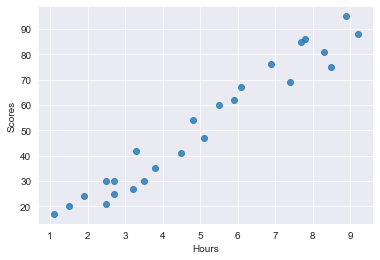

In [6]:
sns.set_style('darkgrid')
sns.regplot(x='Hours',y='Scores',data=df,fit_reg=False)

## Preparation of data by dividing the data into attributes(inputs) and labels(outputs)

In [7]:
X=df[['Hours']]
y=df['Scores']

## Splitting data into training and test sets by using Scikit-Learn's builtin train_test_split() method

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
l=LinearRegression()

In [12]:
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(l.coef_)
print(l.intercept_)

[9.65029083]
3.4050301755918966


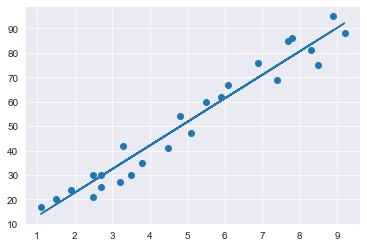

In [14]:
plt.scatter(X,y)
plt.plot(X,l.coef_*X+l.intercept_)

## Making Predictions

In [15]:
pred=l.predict(X_test)

In [16]:
compare=pd.DataFrame({'Actual':y_test,'Predicted':pred})

## Comparing Actual vs Predicted

In [17]:
compare

,Actual,Predicted
8,81,83.502444
16,30,27.530757
0,21,27.530757
23,76,69.992037
11,62,60.341746
9,25,29.460815
13,42,35.250990
1,47,52.621513
22,35,40.076135


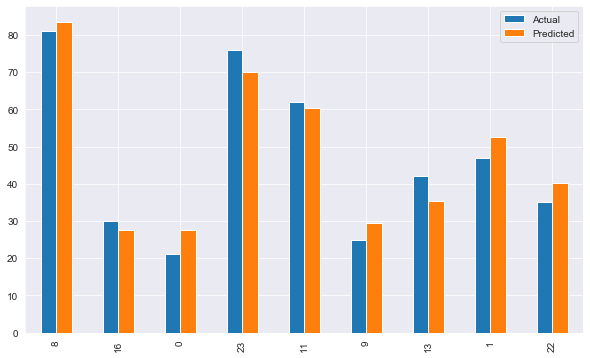

In [18]:
compare.plot(kind='bar',figsize=(10,6))

## Evaluating the model

In [19]:
from sklearn import metrics

In [20]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 4.564015037730867


# What will be the predicted score if a student studies for 9.25 hours/day?

In [21]:
hrs=9.25
own_pred=l.predict([[hrs]])

In [22]:
print("No. of hours: ",hrs)
print("Predicted score: ",own_pred[0])

No. of hours:  9.25
Predicted score:  92.67022037739969
